In [1]:
def plot_phase_portrait(field, x_range, y_range, init_conds, **options):
    """Plot a vector field, together with equilibrium points and trajectories

    'x_range' should have the form (x, xmin, xmax), and likewise for 'y_range'.
    'init_conds' should be a dictionary whose keys are the points that are to
        be used as initial conditions for trajectories. For each such initial
        condition, the value in the dictionary should be the range of t values
        over which to plot the trajectory starting at that initial point, such
        as srange(0, 20, 0.01) for t from 0 to 20 with a step size of 0.01. If
        you don't want to plot any trajectories, just use {} for this.

    Options:
        'field_color' - The color for vector field arrows (default "limegreen")
        'nullcline_colors' - A pair of colors for the two nullclines (default
            ("lightskyblue", "lightsalmon") )
        'eqpt_color' - The color for equilibrium points (default "darkmagenta")
        'trajectory_color' - The color for trajectories (default "red")
        Specifying None (or any False value) for any of the above will cause
        it to not be plotted at all. (Note that for the nullclines, this must
        be a tuple (None, None).)
    All other options are as for the various 'plot*' commands, and are passed
    directly on to them.
    """

    # Initialization
    x, xmin, xmax = x_range
    y, ymin, ymax = y_range
    field_color = options.pop("field_color", "limegreen")
    xnullcline_color, ynullcline_color = options.pop("nullcline_colors",
            ("lightskyblue", "lightsalmon"))
    eqpt_color = options.pop("eqpt_color", "darkmagenta")
    trajectory_color = options.pop("trajectory_color", "red")
    options.setdefault("frame", False)
    options.setdefault("axes", True)
    options.setdefault("aspect_ratio", "auto")
    options.setdefault("xmin", xmin)
    options.setdefault("xmax", xmax)
    options.setdefault("ymin", ymin)
    options.setdefault("ymax", ymax)
    p = Graphics()

    # Plot the vector field itself
    if field_color:
        options["color"] = field_color
        p += plot_vector_field(field, x_range, y_range, **options)

    # Plot the "vertical" nullcline
    if xnullcline_color:
        options["color"] = xnullcline_color
        p += implicit_plot(field[0] == 0, x_range, y_range, linewidth=2, **options)

    # Plot the "horizontal" nullcline
    if ynullcline_color:
        options["color"] = ynullcline_color
        p += implicit_plot(field[1] == 0, x_range, y_range, linewidth=2, **options)

    # Plot trajectories, if any initial conditions were given
    options["color"] = trajectory_color
    options["thickness"] = 2
    for init_cond, t_range in init_conds.items():
        solution = desolve_odeint(field, init_cond, t_range, [x, y])
        p += list_plot(solution, plotjoined=True, **options)

    return p


In [2]:
def latex_eigenvalues(M, digits=4, show_abs=False):
    eigenvalues = []
    for l in sorted(M.eigenvalues(), key=lambda l: -abs(l)):
        if l.imag_part() < 0:
            continue
        if l.imag_part():
            text = fr"{float(l.real()):.{digits}f} \pm {float(l.imag()):.{digits}f} i"
            if show_abs:
                text += fr" \text{{ (abs. value {round(abs(l), digits)}) }}"
            eigenvalues.append(text)
        else:
            eigenvalues.append(f"{float(l):.{digits}f}")
    return LatexExpr(r", \ ".join(eigenvalues))


# Learning goals: 

- Know that linear stability analysis is *inconclusive* in some cases. 
- Be able to tell when it is valid to apply linear stability analysis and when the method is inconclusive. (This is an important theorem called the *Hartman–Grobman Theorem*.) 


**Recall the linear stability analysis method, in *one variable*:**

<div style="font-size: 75%">

Suppose you have a differential equation $X' = f(X)$, with an equilibrium point at $X^*$. 

Step 1: Compute the derivative: $\frac{df}{dX}$

Step 2: Plug in the equilibrium point: $\left. \frac{df}{dX} \right|_{X^*}$. <br>
This number (slope) represents the **linear approximation** of $f$ at the equilibrium point. 

Step 3: That number now tells us the stability: 
- If $\left. \frac{df}{dX} \right|_{X^*} < 0$, then the equilibrium point is ***stable***. 
- If $\left. \frac{df}{dX} \right|_{X^*} > 0$, then the equilibrium point is ***unstable***. 
- If $\left. \frac{df}{dX} \right|_{X^*} = 0$, then *this method is inconclusive*. 

</div>

<br>
<br>
<br>
<br>
<br>


**Compare this with our recent conclusions, for *two or more variables*:**

<div style="font-size: 75%">

Suppose you have a system of differential equations $\begin{cases} X' = f(X, Y) \\ Y' = g(X, Y) \end{cases}$ <br>
with an equilibrium point at $(X^*, Y^*)$. 

Step 1: Compute the Jacobian: $\begin{pmatrix} \frac{\partial f}{\partial X} & \frac{\partial f}{\partial Y} \\ \frac{\partial g}{\partial X} & \frac{\partial g}{\partial Y} \end{pmatrix}$

Step 2: Plug in the equilibrium point: $\left. \begin{pmatrix} \frac{\partial f}{\partial X} & \frac{\partial f}{\partial Y} \\ \frac{\partial g}{\partial X} & \frac{\partial g}{\partial Y} \end{pmatrix} \right|_{(X^*, Y^*)}$ <br>
This matrix represents the **linear approximation** of the differential equation at the equilibrium point. 

Step 3: The eigenvalues of that matrix now tell us the stability: 
- If all eigenvalues are $< 0$, the equilibrium point is ***stable***. 
- If any eigenvalues are $> 0$, the equilibrium point is ***unstable***. 
    - More specifically, if some eigenvalues are $< 0$ and some are $> 0$, then it's a ***saddle point*** (still unstable). 
- If the eigenvalues are *complex* with *real part* $< 0$, the equilibrium point is a ***stable spiral***. 
- If the eigenvalues are *complex* with *real part* $> 0$, the equilibrium point is an ***unstable spiral***. 
- If ... (?) then *this method is inconclusive*. 

</div>

<br>
<br>
<br>
<br>
<br>


**What's wrong with having an eigenvalue that's $0$?**


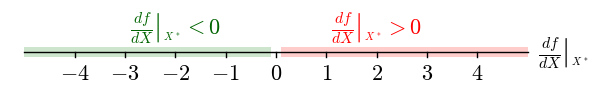

In [3]:
p = Graphics()
p += polygon(((0.1,-0.1), (0.1,0.1), (5,0.1), (5,-0.1)), color="red", alpha=0.2)
p += polygon(((-0.1,-0.1), (-0.1,0.1), (-5,0.1), (-5,-0.1)), color="green", alpha=0.2)
p += line(((-5,0), (5,0)), color="black")
p += text(r"$\left. \frac{df}{dX} \right|_{_{X^*}}$", (5.7,0), color="black", fontsize=16)
for x in range(-4, 5):
    p += line(((x,0), (x,-0.1)), color="black")
    p += text(f"${x}$", (x,-0.4), color="black", fontsize=16)
p += text(r"$\left. \frac{df}{dX} \right|_{_{X^*}} > 0$", (2,0.5), color="red", fontsize=16)
p += text(r"$\left. \frac{df}{dX} \right|_{_{X^*}} < 0$", (-2,0.5), color="darkgreen", fontsize=16)
p.show(axes=False)


**Example: One eigenvalue is exactly $0$, the other is negative**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = -(X + Y) - (X - Y) \cdot (X^2 + Y^2) \\
    Y' = -(X + Y) + (X - Y) \cdot (X^2 + Y^2)
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} -1 & -1 \\ -1 & -1 \end{pmatrix} \qquad
\text{Eigenvalues: } -2, 0 $$

</div>


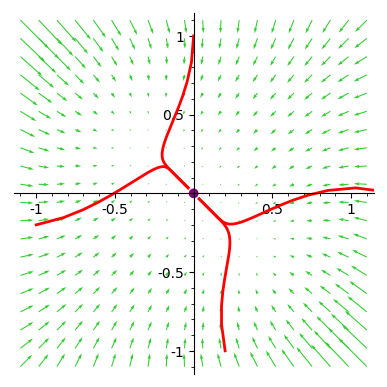

In [4]:
vectorfield(X, Y) = (-(X + Y) - (X - Y)*(X^2 + Y^2), -(X + Y) + (X - Y)*(X^2 + Y^2))
t_range = srange(0, 100, 0.1)
ics = {
    (0, 1): t_range, 
    (1.3, 0): t_range, 
    (0.2, -1): t_range, 
    (-1, -0.2): t_range, 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(frame=False, aspect_ratio=1)


**Example: One eigenvalue is exactly $0$, the other is negative**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = -(X + Y) + (X - Y) \cdot (X^2 + Y^2) \\
    Y' = -(X + Y) - (X - Y) \cdot (X^2 + Y^2)
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} -1 & -1 \\ -1 & -1 \end{pmatrix} \qquad
\text{Eigenvalues: } -2, 0 $$

</div>


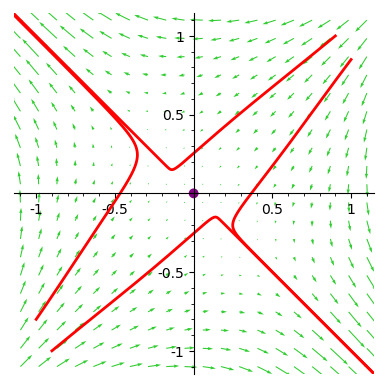

In [5]:
vectorfield(X, Y) = (-(X + Y) + (X - Y)*(X^2 + Y^2), -(X + Y) - (X - Y)*(X^2 + Y^2))
ics = {
    (1, 0.85): srange(0, 4.3, 0.01), 
    (0.9, 1): srange(0, 8.5, 0.01), 
    (-1, -0.8): srange(0, 2.7, 0.01), 
    (-0.9, -1): srange(0, 8.5, 0.01), 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(aspect_ratio=1)


**Example: One eigenvalue is exactly $0$, the other is positive**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = X + Y + (X - Y) \cdot (X^2 + Y^2) \\
    Y' = X + Y - (X - Y) \cdot (X^2 + Y^2)
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \qquad
\text{Eigenvalues: } 2, 0 $$

</div>


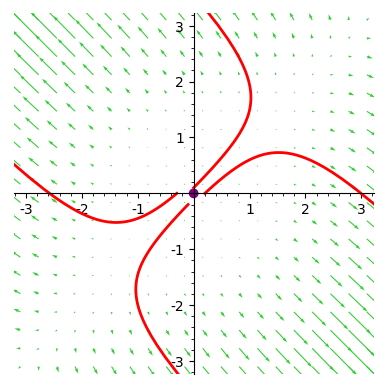

In [6]:
vectorfield(X, Y) = (X + Y + (X - Y)*(X^2 + Y^2), X + Y - (X - Y)*(X^2 + Y^2))
ics = {
    (0.2, 0): srange(0, 1.4, 0.01), 
    (0, 0.1): srange(0, 1.8, 0.01), 
    (-0.3, 0): srange(0, 1.12, 0.01), 
    (-0.1, -0.2): srange(0, 1.25, 0.01), 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -3.1, 3.1), (Y, -3.1, 3.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(aspect_ratio=1)


**Example: One eigenvalue is exactly $0$, the other is positive**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = X + Y - (X - Y) \cdot (X^2 + Y^2) \\
    Y' = X + Y + (X - Y) \cdot (X^2 + Y^2)
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} 1 & 1 \\ 1 & 1 \end{pmatrix} \qquad
\text{Eigenvalues: } 2, 0 $$

</div>


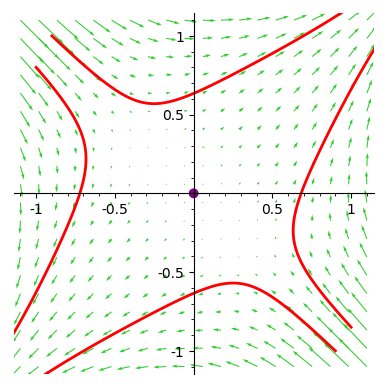

In [7]:
vectorfield(X, Y) = (X + Y - (X - Y)*(X^2 + Y^2), X + Y + (X - Y)*(X^2 + Y^2))
ics = {
    (1, -0.85): srange(0, 4.3, 0.01), 
    (0.9, -1): srange(0, 8.5, 0.01), 
    (-1, 0.8): srange(0, 2.7, 0.01), 
    (-0.9, 1): srange(0, 8.5, 0.01), 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(aspect_ratio=1)


**Example: Eigenvalues are complex, with real part $= 0$**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = -Y - X^3 - X Y^2 \\
    Y' =  X - X^2 Y - Y^3
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \qquad
\text{Eigenvalues: } \pm i $$

</div>


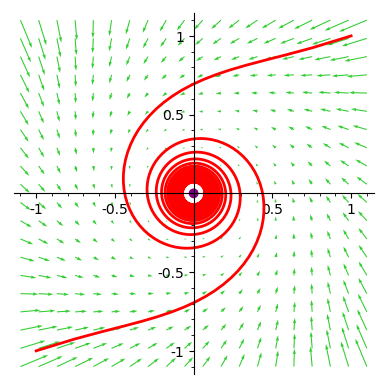

In [8]:
vectorfield(X, Y) = (-Y - X^3 - X*Y^2, X - X^2*Y - Y^3)
t_range = srange(0, 100, 0.1)
ics = {
    (1, 1): t_range, 
    (-1, -1): t_range, 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(aspect_ratio=1)


**Example: Eigenvalues are complex, with real part $= 0$**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = -Y + X^3 + X Y^2 \\
    Y' =  X + X^2 Y + Y^3
\end{cases} \qquad 
\text{Jacobian: } \begin{pmatrix} 0 & -1 \\ 1 & 0 \end{pmatrix} \qquad
\text{Eigenvalues: } \pm i $$

</div>


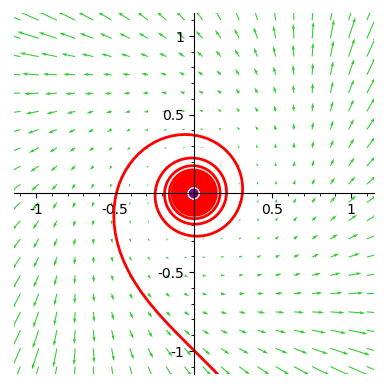

In [9]:
vectorfield(X, Y) = (-Y + X^3 + X*Y^2, X + X^2*Y + Y^3)
t_range = srange(0, 200, 0.1)
ics = {
    (0.05, 0): t_range, 
    #(-0.02, -0.02): t_range, 
}
J0 = jacobian(vectorfield, (X, Y))(0, 0)
label = LatexExpr(r"\text{Jacobian: } ")
label += latex(J0) + r" \qquad \text{Eigenvalues: } "
label += latex_eigenvalues(J0, 1)
#show(label)
p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
p += point((0,0), size=50, color="purple")
p.show(aspect_ratio=1)


**A generalization of both of the above examples: (purely imaginary eigenvalues)**

<div style="font-size: 55%">

$$ \begin{cases}
    X' = -Y + rX \cdot (X^2 + Y^2) \\
    Y' =  X + rY \cdot (Y^2 - X^2)
\end{cases} $$

</div>


In [10]:
@interact(r=slider(-2, 2, 0.1, label="$r$"))
def update(r):
    vectorfield(X, Y) = (-Y + r*X*(X^2 + Y^2), X + r*Y*(X^2 + Y^2))
    t_range = srange(0, 200, 0.1)
    if r < 0:
        ics = {(1, 1): srange(0, 200, 0.1)}
    elif r > 0:
        ics = {(1/20/sqrt(r), 0): srange(0, 200, 0.1)}
    else:
        ics = {(a, 0): srange(0, 10, 0.1) for a in srange(0.2, 1.01, 0.2)}
    J0 = jacobian(vectorfield, (X, Y))(0, 0)
    label = LatexExpr(r"\text{Jacobian: } ")
    label += latex(J0) + r" \qquad \text{Eigenvalues: } "
    label += latex_eigenvalues(J0, 1)
    p = plot_phase_portrait(vectorfield, (X, -1.1, 1.1), (Y, -1.1, 1.1), ics, 
                        nullcline_colors=(None, None), eqpt_color=None)
    p += point((0,0), size=50, color="purple")
    p.show(aspect_ratio=1)
    show(label)


Interactive function <function update at 0x7f3a0ee016a8> with 1 widget
  r: TransformFloatSlider(value=0.0, de…

**What's wrong with having an eigenvalue that is pure imaginary?**


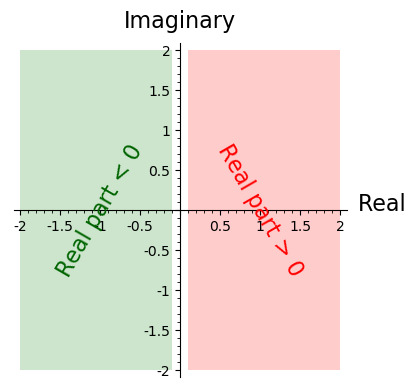

In [11]:
p = Graphics()
p += polygon(((0.1,-2), (0.1,2), (2,2), (2,-2)), color="red", alpha=0.2)
p += polygon(((-0.1,-2), (-0.1,2), (-2,2), (-2,-2)), color="green", alpha=0.2)
p += text("Real part > 0", (1,0), color="red", fontsize=16, rotation=-60)
p += text("Real part < 0", (-1,0), color="darkgreen", fontsize=16, rotation=60)
p.show(axes_labels=("Real", "Imaginary"))

**All of these “edge cases”:** (at least in the 2-variable setting)

Remember that the characteristic polynomial of $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$ is $\lambda^2 - (a+d) \lambda + (ad - bc)$. 


That is, we set $\lambda^2 - T \lambda + D = 0$, <br>
where $T = a + d$ (the *trace* of the matrix)<br>
and $D = ad - bc$ (the *determinant*) of the matrix. 


Then from the quadratic formula, the eigenvalues are $\lambda = \frac{T \pm \sqrt{T^2 - 4D}}{2}$


In [12]:
@interact(step=slider(1,5,1, default=1, label="Step"))
def TD_plane(step):
    T = var("T")
    size = 6
    p = Graphics()
    if step == 5:
        p += plot(T^2/4, (x, -size, 0), fillcolor="green",      fill=0,       fillalpha=0.3)
        p += plot(T^2/4, (x, -size, 0), fillcolor="aquamarine", fill=size*2,  fillalpha=0.5)
        p += plot(T^2/4, (x,  0, size), fillcolor="red",        fill=0,       fillalpha=0.3)
        p += plot(T^2/4, (x,  0, size), fillcolor="fuchsia",    fill=size*2,  fillalpha=0.2)
        p += plot(0, (x,  -size, size), fillcolor="orange",     fill=-size,   fillalpha=0.4)
        p += text("stable node",     (-0.7*size,  0.4*size), color="green",         fontsize=16, rotation=-45)
        p += text("stable spiral",   (-0.4*size,  0.6*size), color="lightseagreen", fontsize=16, rotation=-45)
        p += text("unstable node",   ( 0.7*size,  0.4*size), color="red",           fontsize=16, rotation=45)
        p += text("unstable spiral", ( 0.4*size,  0.6*size), color="fuchsia",       fontsize=16, rotation=45)
        p += text("saddle point",    ( 0.0*size, -0.5*size), color="darkorange",    fontsize=16)
    if 2 <= step <= 4:
        p += plot(T^2/4, (x, -size, size), fillcolor="gray", fill=-2*size, fillalpha=0.5)
        p += plot(T^2/4, (x, -size, size), fillcolor="blue", fill= 2*size, fillalpha=0.2)
        p += text("Complex\neigenvalues", (0,  0.5*size), color="blue", fontsize=16)
        p += text("Real\neigenvalues",    (0, -0.5*size), color="blue", fontsize=16)
    if step > 1:
        p += plot(T^2/4, (x, -size, size), color="black", thickness=3)
    if step > 2:
        p += line(((0,0), (0,size*2)), color="black", thickness=3)
    if step > 3:
        p += line(((-size,0), (size,0)), color="black", thickness=3)
    p += text("$T$", (size*1.15,0), color="black", fontsize=16)
    p += text("$D$", (0,size*1.15), color="black", fontsize=16)
    p.show(aspect_ratio=1, xmin=-size, xmax=size, ymin=-size, ymax=size, figsize=7)


Interactive function <function TD_plane at 0x7f3a11051620> with 1 widget
  step: TransformIntSlider(value=1, d…

**Conclusion: “linear stability analysis” in two or more dimensions**

<div style="font-size: 75%">

**Definition:** A matrix is called ***degenerate*** (or ***non-generic***, or you can just call it “an edge case”) if any of its eigenvalues is exactly $0$, or is complex with real part equal to $0$, or has any *repeated* eigenvalues (double roots of the characteristic polynomial). 

**Theorem: (The Hartman–Grobman Theorem)** <br>
As long as the Jacobian matrix at the equilibrium point is *not* degenerate (so *not* an edge case), then it can be used (via its eigenvalues) to classify the type of the equilbrium point. 

But if the Jacobian matrix has a $0$ eigenvalue, or an eigenvalue that is pure imaginary (complex with real part $0$), or repeated eigenvalues, then *the linear stability method is inconclusive*. 

</div>
